In [1]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

In [69]:
df=pd.read_csv('kyphosis.csv')
df.head()
df['Kyphosis'].value_counts().index[0]

'absent'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


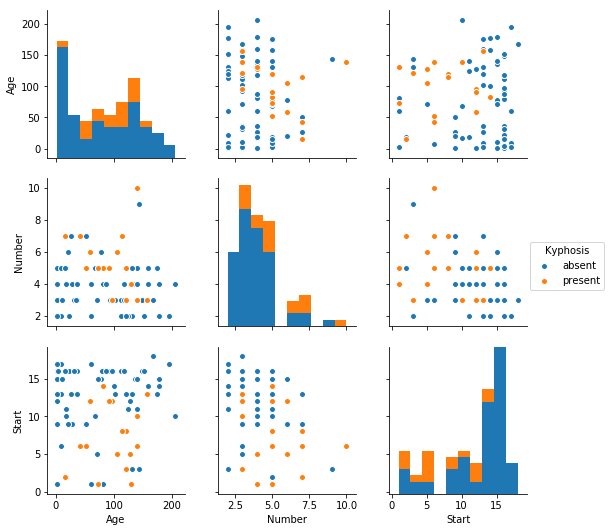

In [17]:
sns.pairplot(df,hue='Kyphosis')


In [19]:
from sklearn.cross_validation import train_test_split


In [23]:
x=df.drop('Kyphosis',axis=1)


In [26]:
y=df['Kyphosis']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree=DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predictions =dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[20  1]
 [ 4  2]]


             precision    recall  f1-score   support

     absent       0.83      0.95      0.89        21
    present       0.67      0.33      0.44         6

avg / total       0.80      0.81      0.79        27



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier(n_estimators=200)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rfc_pred=rfc.predict(X_test)

In [48]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  1]
 [ 3  3]]


             precision    recall  f1-score   support

     absent       0.87      0.95      0.91        21
    present       0.75      0.50      0.60         6

avg / total       0.84      0.85      0.84        27



In [50]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

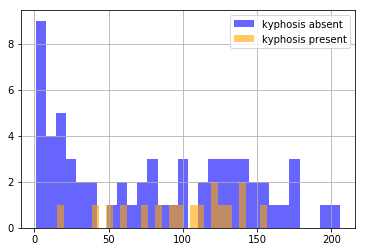

In [65]:
df[df['Kyphosis']=='absent']['Age'].hist(bins=30,color='blue',label='kyphosis absent',alpha=0.6)
df[df['Kyphosis']=='present']['Age'].hist(bins=30,color='orange',label='kyphosis present',alpha=0.6)
plt.legend()